In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scripts.dataset_explorer import SODataSetExplorer
from feature_handlers import JobSatisfactionHandler, ProgrammingLanguagesHandler

In [3]:
import plotly.express as px
import plotly.figure_factory as ff

In [4]:
import chart_studio
import chart_studio.plotly as py
import os

chart_studio_apikey = os.getenv('CHART_STUDIO_API_KEY')
chart_studio.tools.set_credentials_file(username='masharo', api_key=chart_studio_apikey)

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Load datasets

In [6]:
year_range = list(range(2017, 2021))
df_explorer = SODataSetExplorer(year_range)

### Job Satisfaction

In [7]:
JobSatisfactionHandler.rename_and_normalize(df_explorer)

In [53]:
job_satisfaction = df_explorer.get_feature_dummies_per_year('job_satisfaction', keep_features=['year', 'respondent'])

In [115]:
satisfied_label = 1
unsatisfied_label = 0
satisfaction_scale_mapping = {
    'Very satisfied': satisfied_label, 'Slightly satisfied': satisfied_label, 
    'Neither satisfied nor dissatisfied': unsatisfied_label, 
    'Slightly dissatisfied': unsatisfied_label, 
    'Very dissatisfied': unsatisfied_label,
}
for year, df in df_explorer.datasets.items():
    df.job_satisfaction.replace(satisfaction_scale_mapping, inplace=True)

job_satisfaction = df_explorer.get_feature_dummies_per_year('job_satisfaction', keep_features=['year', 'respondent'])

In [116]:
corr = df_explorer.datasets[2017].corr()
fig = px.imshow(corr, color_continuous_scale='Viridis')
# fig.update_layout(autosize=False, width=1000, height=1000)
fig.show()

### Programming Languages

In [11]:
ProgrammingLanguagesHandler.rename_and_normalize(df_explorer)

In [32]:
programming_languages = df_explorer.get_feature_dummies_per_year('programming_languages', keep_features=['year', 'respondent'])

### Developer Type

In [63]:
df_explorer.rename_columns({'developer_type': 'dev_type'})

In [64]:
dev_type = df_explorer.get_feature_dummies_per_year('dev_type', keep_features = ['year', 'respondent'])

### Undergrad Major

In [69]:
df_explorer.rename_columns({'major_undergrad': 'undergrad_major'})

In [70]:
undergrad_major = df_explorer.get_feature_dummies_per_year('undergrad_major', keep_features = ['year', 'respondent'])

### Remote Status

In [75]:
remote_rename = {
    'remote_status': 'remote', 
    'home_remote': 'remote', 
    'work_remote': 'remote', 
}
df_explorer.rename_columns(remote_rename)

In [87]:
remote = df_explorer.get_feature_dummies_per_year('remote', keep_features = ['year', 'respondent'], years=[2017, 2019])

### Programming Language - Job Satisfaction Correlation

In [118]:
year = 2017
job_satisfaction_df = job_satisfaction[year]
programming_languages_df = programming_languages[year]
dev_type_df = dev_type[year]
undergrad_major_df = undergrad_major[year]
remote_df = remote[year]

features_df = pd.merge(
    job_satisfaction_df, remote_df, 
    on=['respondent', 'year'], 
    how='inner'
)

In [119]:
df_for_corr = features_df.drop(['respondent', 'year'], axis=1)

In [120]:
corr = df_for_corr.corr()

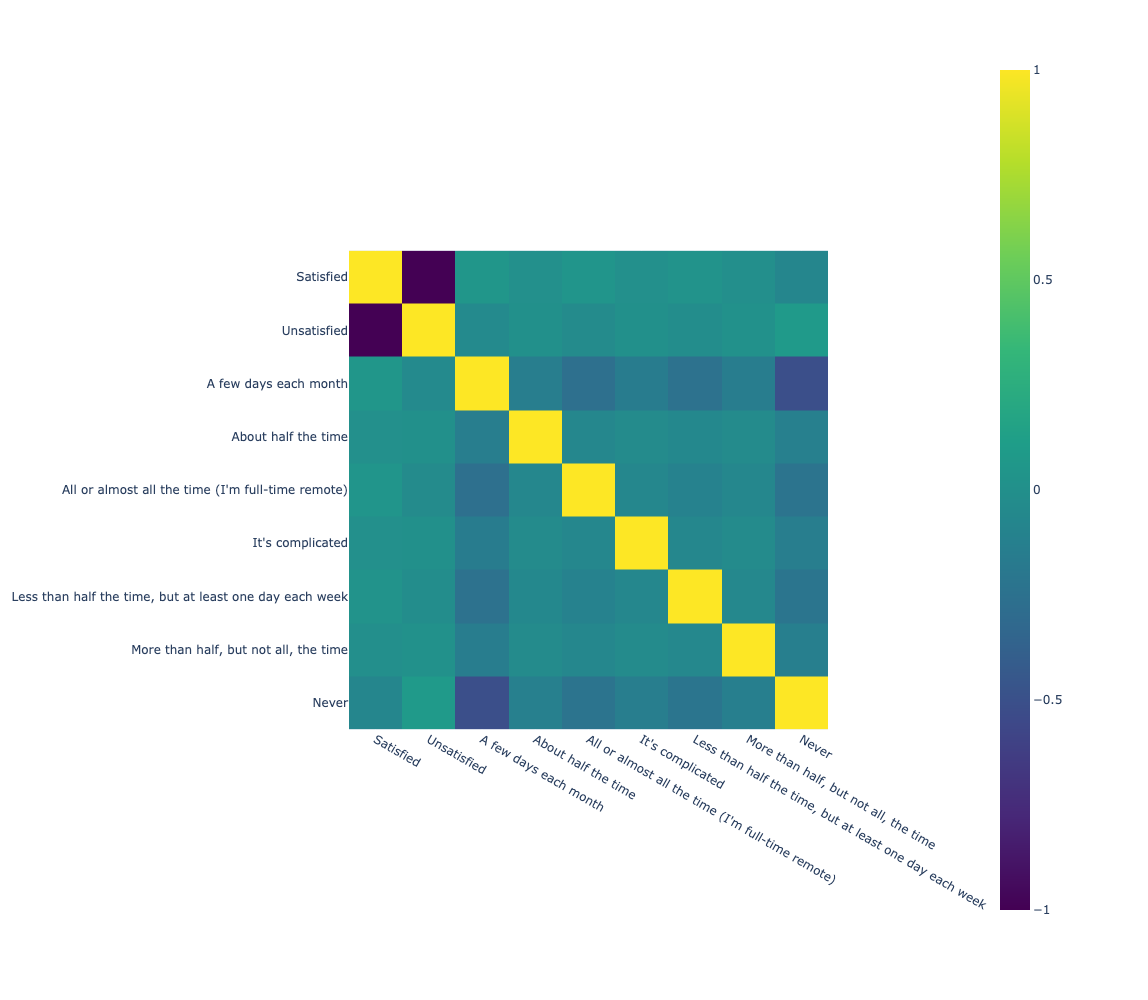

In [121]:
fig = px.imshow(corr, color_continuous_scale='Viridis')
fig.update_layout(autosize=False, width=1000, height=1000)
fig.show()

### 2019 catergorial correlation

In [132]:
from dython.nominal import associations
import pandas as pd

In [180]:
year_range = [2019]
df_year = SODataSetExplorer(year_range).datasets[2019]

In [181]:
features = [
    "country",
    "job_sat",
    "ed_level",
    "undergrad_major",
    "employment",
    "work_remote",
    "main_branch",
    "hobbyist",
    "trans",
    "org_size",
]

In [182]:
df_2019_categorical = df_year[features]

In [183]:
df_2019_categorical.head()

,country,job_sat,ed_level,undergrad_major,employment,work_remote,main_branch,hobbyist,trans,org_size
0,United Kingdom,NaN,Primary/elementary school,NaN,"Not employed, and not looking for work",NaN,I am a student who is learning to code,Yes,No,NaN
1,Bosnia and Herzegovina,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,"Not employed, but looking for work",NaN,I am a student who is learning to code,No,No,NaN
2,Thailand,Slightly satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,Employed full-time,Less than once per month / Never,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,No,100 to 499 employees
3,United States,Slightly satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",Employed full-time,Less than once per month / Never,I am a developer by profession,No,No,100 to 499 employees
4,Ukraine,Slightly dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",Employed full-time,A few days each month,I am a developer by profession,Yes,No,"10,000 or more employees"


In [192]:
df_2019_categorical.main_branch.unique()

array(['I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession',
       'I am a student who is learning to code',
       'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', nan],
      dtype=object)

In [185]:
#df_2019_categorical.employment.unique()

In [186]:
employed_types = ['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time']
df_2019_categorical = df_2019_categorical[df_2019_categorical.employment.isin(employed_types)]
df_2019_higher_corr = df_2019_categorical.drop(['trans', 'hobbyist'], axis=1)

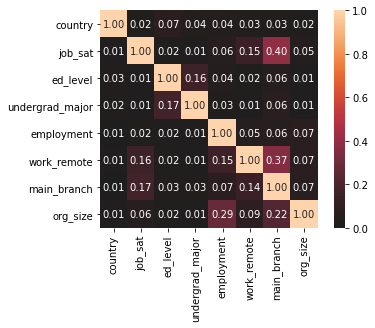

In [187]:
corr_results = associations(df_2019_higher_corr, theil_u=True);

In [188]:
category_labeling = {
    "ed_level": "Education Level",
    "undergrad_major": "Undergrad Major",
    "job_satisfaction": "Job Satisfaction",
    "employment": "Employment",
    "remote": "Remote Work",
    "main_branch": "Main Branch",
    "org_size": "Organization Size"
}

In [189]:
corr = corr_results['corr']
corr.rename(index=category_labeling, inplace=True)
corr.rename(columns=category_labeling, inplace=True)

In [190]:
corr.head()

,country,job_sat,Education Level,Undergrad Major,Employment,work_remote,Main Branch,Organization Size
country,1.000000,0.019467,0.072451,0.039285,0.039110,0.026901,0.028157,0.023254
job_sat,0.009293,1.000000,0.015635,0.012351,0.059746,0.147216,0.396929,0.046258
Education Level,0.032936,0.014890,1.000000,0.158879,0.042697,0.015837,0.057723,0.014346
Undergrad Major,0.018975,0.012498,0.168814,1.000000,0.026980,0.013716,0.064720,0.010811
Employment,0.006431,0.020580,0.015443,0.009184,1.000000,0.049933,0.061674,0.073617


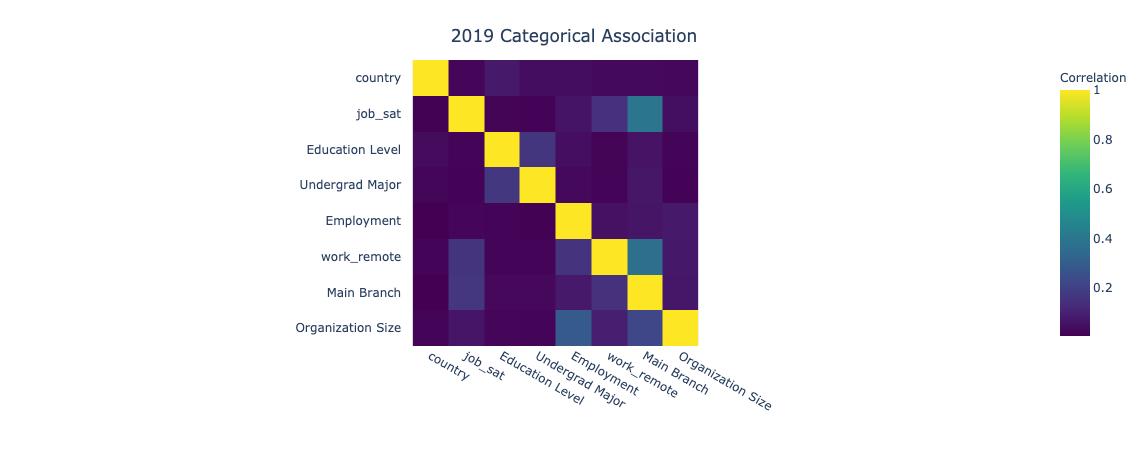

In [191]:
fig = px.imshow(
    corr, color_continuous_scale='Viridis',
    labels={'color': 'Correlation', 'x': 'Category', 'y': 'Category'}
)

fig.update_layout(
    title=dict(
        text= "2019 Categorical Association",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis=dict(title=''),
    yaxis=dict(
        title='',
        zeroline=False,
        ticks= "outside", 
        tickcolor= 'white', 
        ticklen= 8,
    ),
)

fig.show()

In [53]:
py.plot(fig, filename = 'stack-overflow-2019-categorical-correlation')

'https://plotly.com/~masharo/142/'